# **Otimização**
## **Lista de Exercícios 01-A | Questão 1**
**Aluno:** André Paiva Conrado Rodrigues

In [9]:
# Importação de dependências
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Problema de Otimização:**

\begin{equation*}
\begin{aligned}
\text{Minimizar} \\
&& f(x) = 2x_{1} + x_{2}^{2} - 2\\
\text{Sujeito a} \\
c_{1}: && -(x_{1} + 3)^{2} - x_{2}^{2} + 9 \geq 0 \\
c_{2}: && -3x_{1} - 2x_{2} - 6 \geq 0 \\
\end{aligned}
\end{equation*}

**Trabalhando na primeira restrição:**
\begin{equation*}
\begin{aligned}
-(x_{1} + 3)^{2} - x_{2}^{2} + 9 \geq 0 \\
-(x_{1} + 3)^{2} - x_{2}^{2} \geq -9 \\
\\
(x_{1} + 3)^{2} + x_{2}^{2} \leq 9 \\
\text{Círculo de raio 3 com centro em } (-3, 0)
\end{aligned}
\end{equation*}

In [10]:
# Restrição C1
c1_x1 = (3*np.sin(np.linspace(0, 2*np.pi, 180))) - 3
c1_x2 = (3*np.cos(np.linspace(0, 2*np.pi, 180)))

**Trabalhando na segunda restrição:**
\begin{equation*}
\begin{aligned}
-3x_{1} - 2x_{2} - 6 \geq 0 \\
2x_{2} \leq -3x_{1} - 6 \\
\\
x_{2} \leq -\frac{3x_{1}}{2} - 3 \\
\text{Limite abaixo de uma reta}
\end{aligned}
\end{equation*}

In [11]:
# Restrição C2
c2_x1 = np.linspace(-10, 5, 2)
c2_x2 = -(3.0*c2_x1/2.0) - 3

**Visualizando a região de restrição graficamente:**

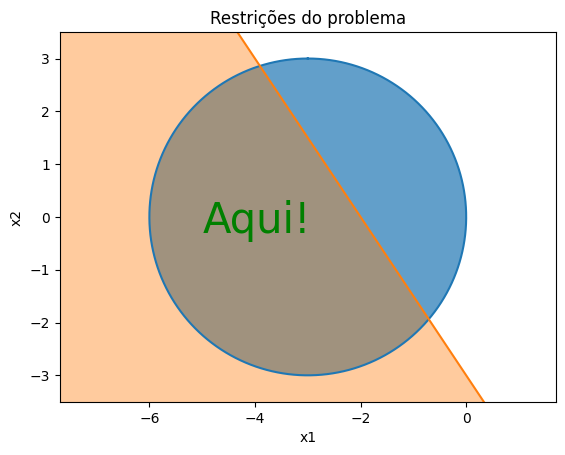

In [12]:
plt.plot(c1_x1, c1_x2)
plt.plot(c2_x1, c2_x2)
plt.text(-5, -0.3, "Aqui!", fontsize=30, color='green')
plt.fill_between(c1_x1, c1_x2, alpha=0.7)
plt.fill_between(c2_x1, c2_x2, -4, alpha=0.4)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis('equal')
plt.xlim([-6.5, 0.5])
plt.ylim([-3.5, 3.5])
plt.title("Restrições do problema")
plt.show()